In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

%matplotlib inline

In [2]:
df=pd.read_csv("auto-mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.drop(["car name"],axis=1,inplace=True)

In [5]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [6]:
df.shape

(398, 8)

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
df=df[df.horsepower !="?"]

In [12]:
"?"in df

False

In [13]:
df.shape

(392, 8)

In [14]:
##Corelation Matrix
df.corr()["mpg"].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

<AxesSubplot:>

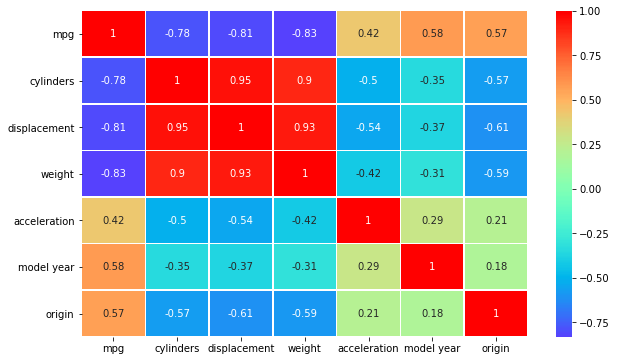

In [15]:
##plotting the heatmap of corelation matrix
plt.figure(figsize= (10,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.5, center=0, cmap='rainbow')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinders', ylabel='count'>

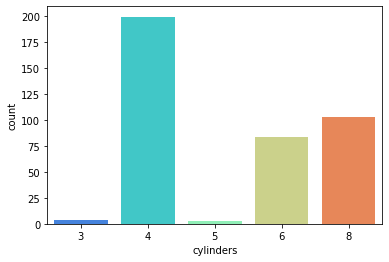

In [16]:
##Univariate Analysis
sns.countplot(df["cylinders"],data=df,palette="rainbow")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='model year', ylabel='count'>

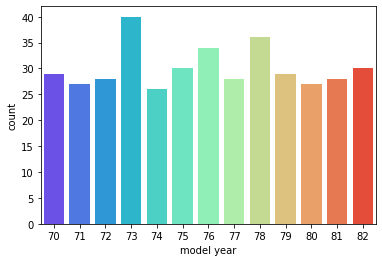

In [17]:
sns.countplot(df["model year"],palette="rainbow")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='count'>

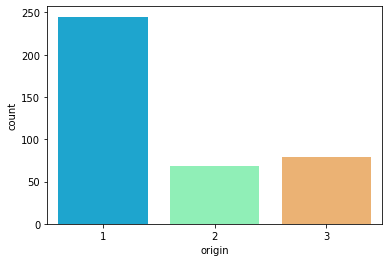

In [18]:
sns.countplot(df["origin"],palette="rainbow")

<AxesSubplot:xlabel='cylinders', ylabel='mpg'>

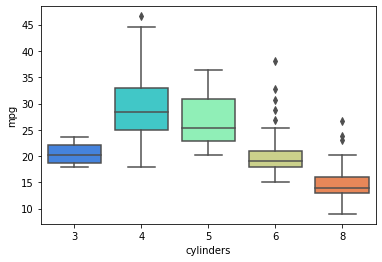

In [19]:
##Multivariate analysis
sns.boxplot(y="mpg",x="cylinders",data=df,palette="rainbow")

<AxesSubplot:xlabel='model year', ylabel='mpg'>

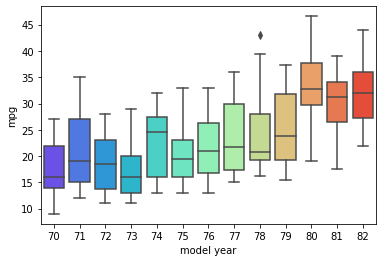

In [20]:
sns.boxplot(y="mpg",x="model year",data=df,palette="rainbow")

In [21]:
##data modelling
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values

In [22]:
##Splitting Traing and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=regression.predict(x_test)
print (regression.score(x_test,y_test))


0.8191428142279116


In [25]:
##Ploynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=0)
lin_regression=LinearRegression()
lin_regression.fit(x_train,y_train)
print(lin_regression.score(x_test,y_test))

0.8342085926204778


CONCLUSION:
Accuracy score improves in the case of polynomial regression compared to the linear regression because it fits data much better. In this project, what we learned:

Loading the dataset
Univariate analysis
multivariate analysis
Linear regression
Polynomial Regression